In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("music_clean.csv")
print("The number of rows  in this dataset is", len(df))
df.head()

The number of rows  in this dataset is 1000


,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [3]:
df.isna().sum() 

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

In [4]:
df.drop_duplicates()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [5]:
df.describe()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,30612.445000,51.660000,0.258649,0.542602,2.172204e+05,0.636464,0.137289,0.199993,-8.253305,0.077879,120.368400,0.480057,0.50000
std,12210.566847,14.028585,0.307494,0.160322,1.175582e+05,0.237789,0.285558,0.160435,5.158523,0.089451,28.942130,0.237854,0.50025
min,4.000000,0.000000,0.000003,0.062400,-1.000000e+00,0.002510,0.000000,0.025400,-38.718000,0.023400,56.855000,0.029800,0.00000
25%,22782.000000,43.750000,0.013275,0.444000,1.806562e+05,0.485750,0.000000,0.100000,-9.775500,0.033100,95.909750,0.306500,0.00000
50%,35907.000000,54.000000,0.116000,0.548500,2.163000e+05,0.676500,0.000089,0.131000,-6.855000,0.043600,119.952961,0.473500,0.50000
75%,38396.000000,62.000000,0.426500,0.657000,2.605025e+05,0.822500,0.042825,0.273250,-4.977750,0.074950,140.033000,0.654000,1.00000
max,49940.000000,82.000000,0.996000,0.950000,1.617333e+06,0.995000,0.975000,0.991000,-0.883000,0.710000,207.852000,0.968000,1.00000


                  Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0          1.000000    0.492969      0.024298     -0.054380   
popularity          0.492969    1.000000     -0.247515      0.205445   
acousticness        0.024298   -0.247515      1.000000     -0.179763   
danceability       -0.054380    0.205445     -0.179763      1.000000   
duration_ms        -0.071956   -0.163496      0.012050     -0.150975   
energy             -0.045933    0.235324     -0.741339      0.164524   
instrumentalness   -0.239805   -0.419774      0.288057     -0.298374   
liveness            0.003682   -0.052063     -0.115700     -0.077320   
loudness           -0.043493    0.324596     -0.644017      0.291376   
speechiness         0.006128    0.058585     -0.086965      0.176567   
tempo               0.000403    0.045189     -0.149198     -0.072758   
valence             0.055250    0.145073     -0.189417      0.462755   
genre               0.554045    0.571548     -0.194291     -0.02

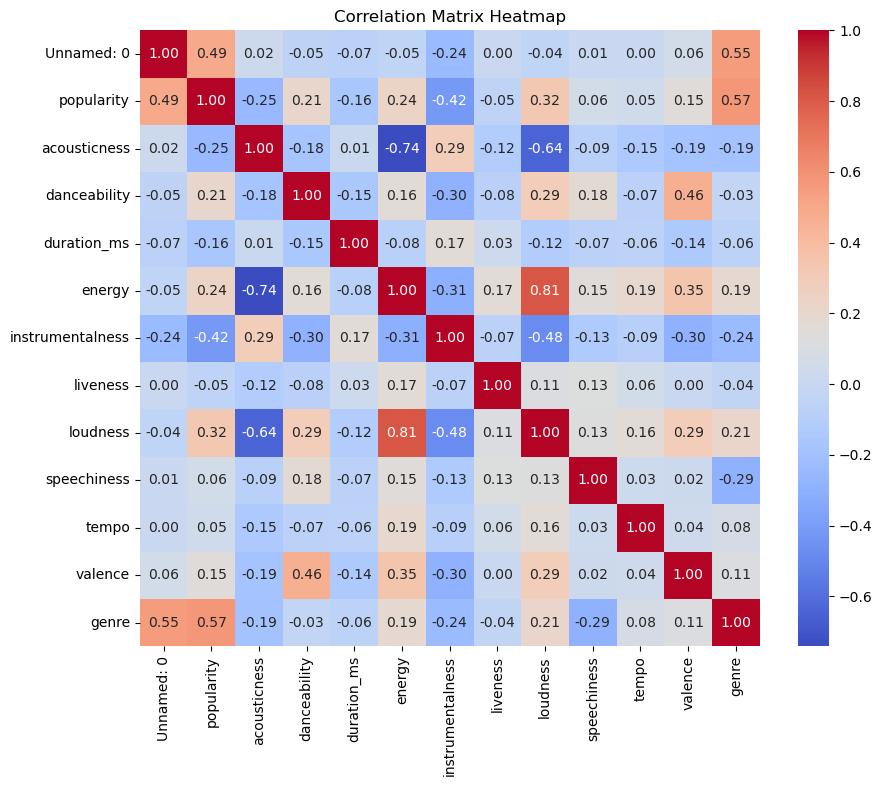

In [6]:
correlation_matrix = df.corr()

print(correlation_matrix)

correlation_matrix.to_csv('correlation_matrix.csv', index=True)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix_heatmap.png')
plt.show()

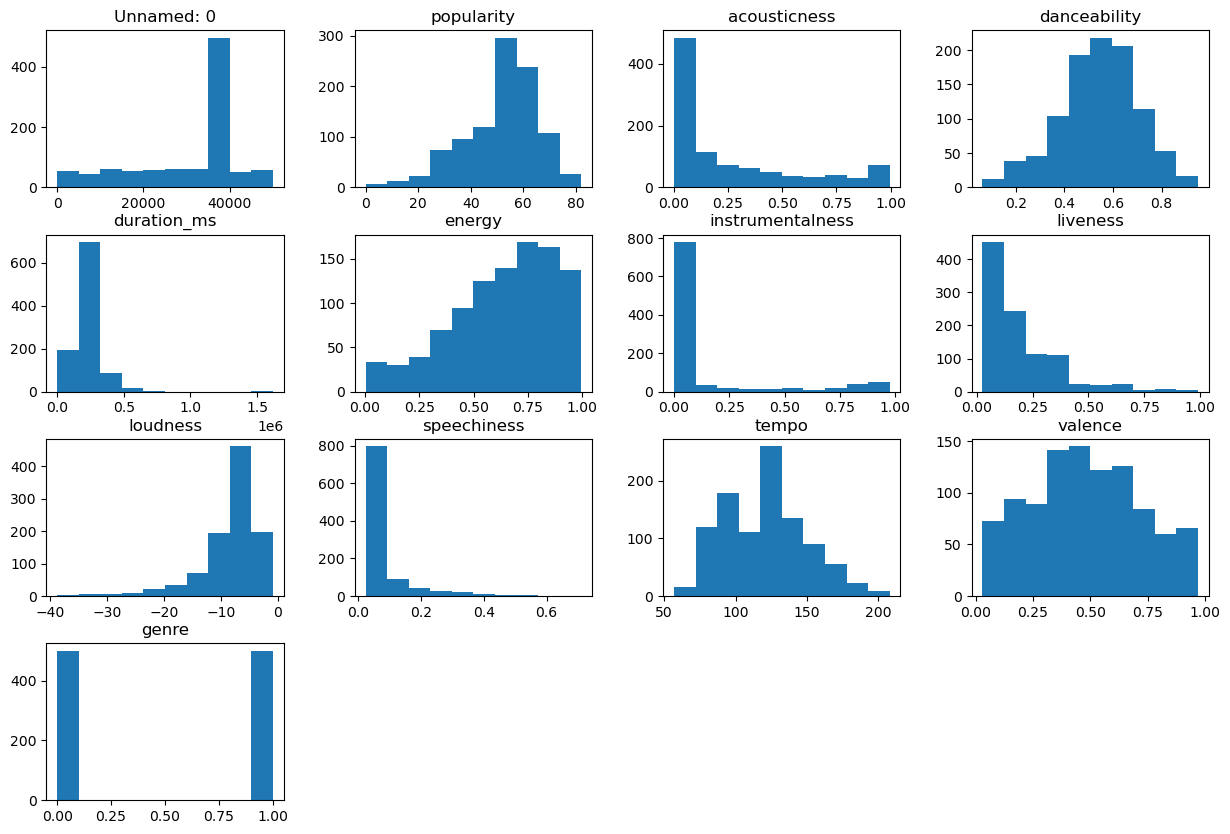

In [7]:
hist_worst=df.hist(bins=10, figsize=(15, 10),grid=False,)
plt.savefig("histograms.png")

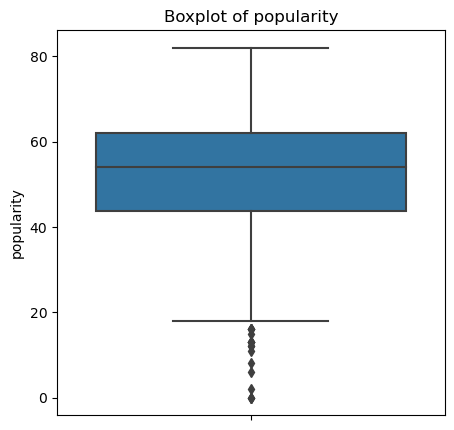

In [8]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='popularity', data=df)
plt.title('Boxplot of popularity')
plt.savefig("Boxplot of popularity.png")
plt.show()

In [9]:
#use IQR method to handle outliers           
q1 = df['popularity'].quantile(0.25)
q3 = df['popularity'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(43.75, 62.0, 18.25)

In [10]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(16.375, 89.375)

In [11]:
df.loc[(df['popularity'] > upper_limit) | (df['popularity'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
519,5343,16.0,0.008830,0.4380,299053.0,0.9790,0.256000,0.1690,-6.269,0.4080,152.978000,0.1260,0
522,8932,12.0,0.000109,0.2480,105820.0,0.9180,0.785000,0.2440,-5.005,0.1070,119.952961,0.3400,0
535,7487,13.0,0.058800,0.5230,229720.0,0.8430,0.000559,0.1320,-3.988,0.0328,119.952961,0.4940,0
547,43998,0.0,0.986000,0.3430,259040.0,0.0153,0.908000,0.1810,-30.433,0.0453,169.220000,0.1020,0
565,8648,16.0,0.024600,0.5450,225107.0,0.9170,0.000000,0.3070,-2.839,0.0352,132.930000,0.6510,0
569,8721,13.0,0.826000,0.1530,205347.0,0.3590,0.888000,0.0816,-17.719,0.0384,83.894000,0.3130,0
572,8140,16.0,0.000286,0.5270,92573.0,0.7520,0.785000,0.1520,-5.760,0.0406,95.018000,0.4740,0
584,42137,0.0,0.928000,0.3820,588400.0,0.1610,0.559000,0.1200,-19.090,0.0535,93.319000,0.2660,0
585,42727,0.0,0.956000,0.3320,194053.0,0.1880,0.929000,0.1370,-20.450,0.0446,136.270000,0.0550,0
633,6988,13.0,0.761000,0.5440,214800.0,0.7920,0.000000,0.3350,-3.512,0.0462,119.998000,0.6150,0


In [12]:
df.loc[(df['popularity']>=upper_limit), 'popularity'] = upper_limit
df.loc[(df['popularity']<=lower_limit), 'popularity'] = lower_limit

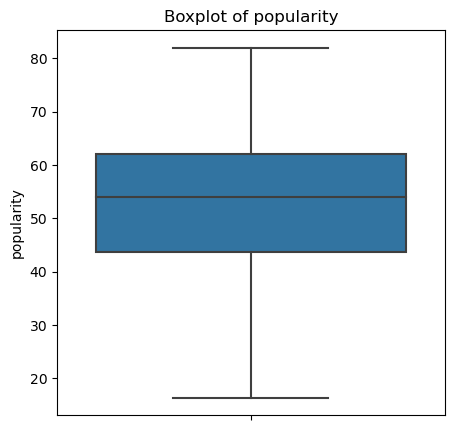

In [13]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='popularity', data=df)
plt.title('Boxplot of popularity')
plt.savefig("Boxplot of popularity after outlier.png")
plt.show()

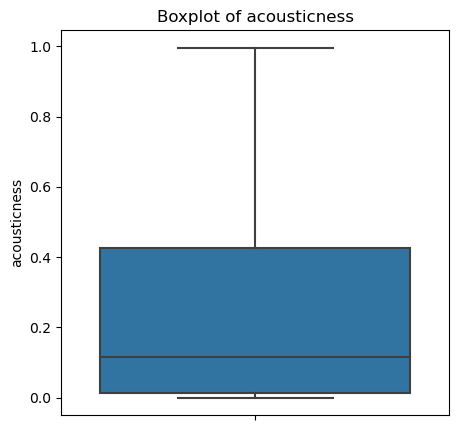

In [14]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='acousticness', data=df)
plt.title('Boxplot of acousticness')
plt.savefig("Boxplot of acousticness.png")
plt.show()

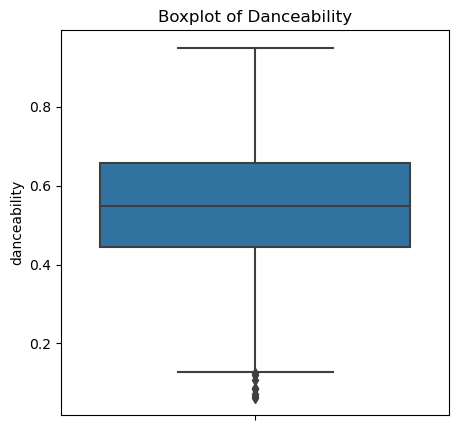

In [15]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='danceability', data=df)
plt.title('Boxplot of Danceability')
plt.savefig("Boxplot of Danceability.png")
plt.show()

In [16]:
#use IQR method to handle outliers           
q1 = df['danceability'].quantile(0.25)
q3 = df['danceability'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(0.444, 0.657, 0.21300000000000002)

In [17]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(0.1245, 0.9765)

In [18]:
df.loc[(df['danceability'] > upper_limit) | (df['danceability'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
164,35156,53.000,0.973,0.1070,345373.0,0.2890,0.934,0.0812,-16.150,0.0337,77.787000,0.0364,1
549,43721,36.000,0.937,0.0874,-1.0,0.0169,0.773,0.1080,-32.245,0.0478,85.068000,0.0500,0
589,40049,36.000,0.865,0.1240,179453.0,0.3090,0.800,0.1030,-15.882,0.0346,63.827000,0.0796,0
638,11069,39.000,0.872,0.1210,499960.0,0.2700,0.746,0.1760,-13.276,0.0421,71.806000,0.0350,0
723,44143,16.375,0.954,0.0843,1617333.0,0.1230,0.740,0.7110,-17.919,0.0396,56.855000,0.0446,0
727,44334,35.000,0.959,0.0667,226787.0,0.0338,0.885,0.0900,-26.563,0.0474,119.952961,0.0376,0
768,8592,16.375,0.464,0.0624,177867.0,0.2180,0.941,0.1250,-12.529,0.0416,62.838000,0.0298,0
925,40829,25.000,0.973,0.0712,257280.0,0.0169,0.350,0.0731,-26.569,0.0496,77.780000,0.0311,0


In [19]:
df.loc[(df['danceability']>=upper_limit), 'danceability'] = upper_limit
df.loc[(df['danceability']<=lower_limit), 'danceability'] = lower_limit

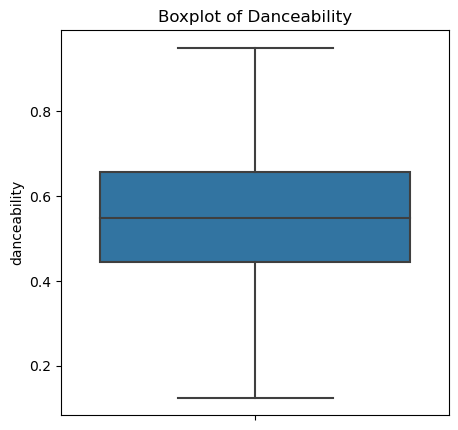

In [20]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='danceability', data=df)
plt.title('Boxplot of Danceability')
plt.savefig("Boxplot of Danceability after outlier.png")
plt.show()

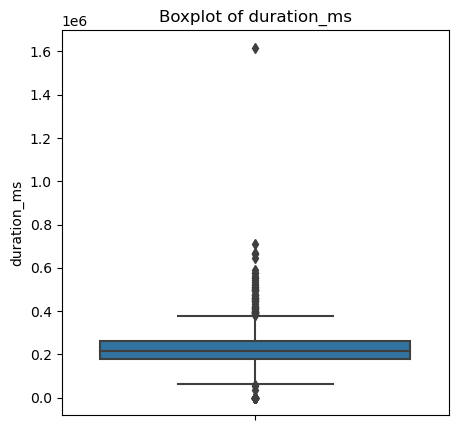

In [21]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='duration_ms', data=df)
plt.title('Boxplot of duration_ms')
plt.savefig("Boxplot of duration_ms.png")
plt.show()

In [22]:
#use IQR method to handle outliers           
q1 = df['duration_ms'].quantile(0.25)
q3 = df['duration_ms'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(180656.25, 260502.5, 79846.25)

In [23]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(60886.875, 380271.875)

In [24]:
df.loc[(df['duration_ms'] > upper_limit) | (df['duration_ms'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897000,0.228,1
17,38356,58.0,0.084400,0.593,-1.0,0.8370,0.000000,0.1480,-4.834,0.0302,99.947000,0.569,1
18,36749,71.0,0.002900,0.736,-1.0,0.7110,0.000275,0.0948,-5.503,0.0352,112.309000,0.719,1
25,35506,51.0,0.069100,0.557,-1.0,0.6100,0.011700,0.3410,-9.899,0.1110,155.966000,0.128,1
34,36760,63.0,0.010500,0.359,563893.0,0.7620,0.281000,0.3680,-8.323,0.0320,89.259000,0.167,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,44731,43.0,0.989000,0.198,-1.0,0.0382,0.969000,0.1700,-29.885,0.0443,136.392000,0.127,0
957,32420,32.0,0.079200,0.364,431936.0,0.7520,0.000016,0.0966,-5.623,0.1000,173.715000,0.636,0
968,27252,73.0,0.170000,0.837,-1.0,0.5490,0.000000,0.0570,-5.722,0.1670,121.954000,0.209,0
987,43943,29.0,0.916000,0.230,664600.0,0.0408,0.222000,0.0855,-23.741,0.0459,119.952961,0.105,0


In [25]:
df.loc[(df['duration_ms']>=upper_limit), 'duration_ms'] = upper_limit
df.loc[(df['duration_ms']<=lower_limit), 'duration_ms'] = lower_limit

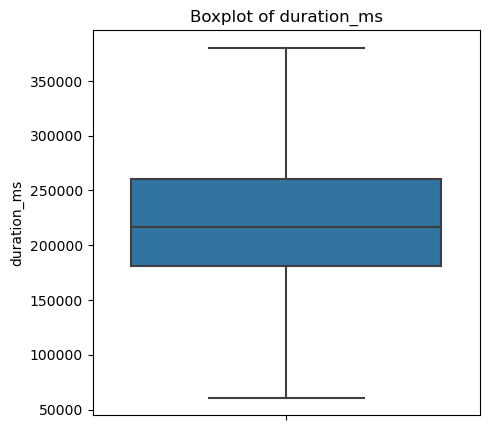

In [26]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='duration_ms', data=df)
plt.title('Boxplot of duration_ms')
plt.savefig("Boxplot of duration_ms after outlier.png")
plt.show()

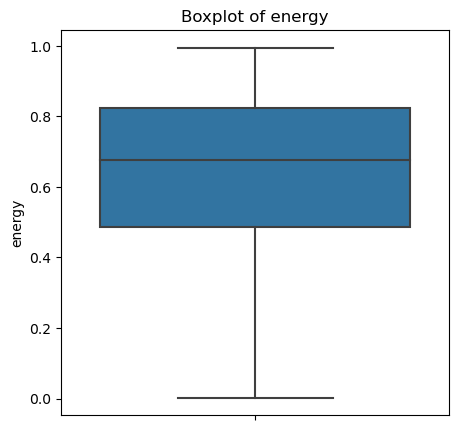

In [27]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='energy', data=df)
plt.title('Boxplot of energy')
plt.savefig("Boxplot of energy.png")
plt.show()

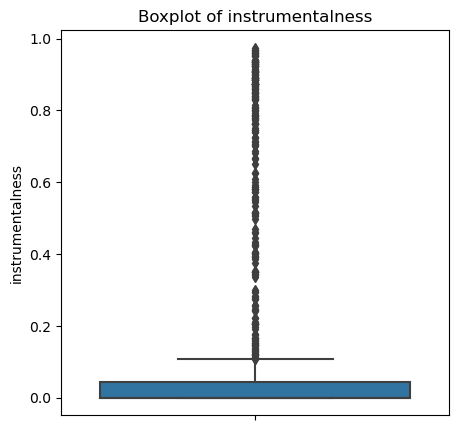

In [28]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='instrumentalness', data=df)
plt.title('Boxplot of instrumentalness')
plt.savefig("Boxplot of instrumentalness.png")
plt.show()

In [29]:
#use IQR method to handle outliers           
q1 = df['instrumentalness'].quantile(0.25)
q3 = df['instrumentalness'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(0.0, 0.042825, 0.042825)

In [30]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-0.0642375, 0.1070625)

In [31]:
df.loc[(df['instrumentalness'] > upper_limit) | (df['instrumentalness'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
34,36760,63.000,0.010500,0.359,380271.875,0.7620,0.281,0.3680,-8.323,0.0320,89.259000,0.1670,1
44,35843,63.000,0.000006,0.382,298253.000,0.8670,0.581,0.1960,-7.426,0.0399,87.309000,0.4530,1
48,38166,63.000,0.269000,0.450,297320.000,0.3560,0.515,0.0944,-13.692,0.0337,179.937000,0.0839,1
52,37456,58.000,0.001440,0.627,194533.000,0.6300,0.190,0.3370,-12.330,0.0403,125.154000,0.3230,1
83,36620,56.000,0.011600,0.507,60886.875,0.6660,0.343,0.1290,-8.362,0.0290,77.979000,0.1850,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1864,40.000,0.000303,0.711,284093.000,0.9540,0.834,0.0700,-7.914,0.0707,124.982000,0.8970,0
987,43943,29.000,0.916000,0.230,380271.875,0.0408,0.222,0.0855,-23.741,0.0459,119.952961,0.1050,0
989,33345,26.000,0.379000,0.570,282373.000,0.9490,0.351,0.0928,-3.529,0.1180,119.952961,0.8070,0
994,9233,16.375,0.812000,0.615,109107.000,0.2290,0.953,0.1650,-18.944,0.0472,184.591000,0.0863,0


In [32]:
df.loc[(df['instrumentalness']>=upper_limit), 'instrumentalness'] = upper_limit
df.loc[(df['instrumentalness']<=lower_limit), 'instrumentalness'] = lower_limit

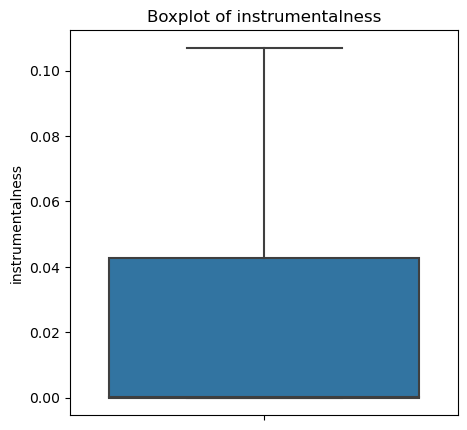

In [33]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='instrumentalness', data=df)
plt.title('Boxplot of instrumentalness')
plt.savefig("Boxplot of instrumentalness after outlier.png")
plt.show()

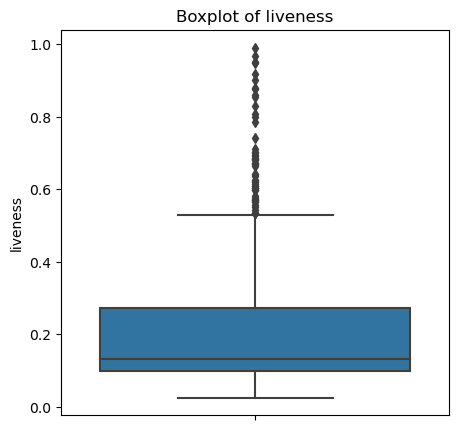

In [34]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='liveness', data=df)
plt.title('Boxplot of liveness')
plt.savefig("Boxplot of liveness.png")
plt.show()

In [35]:
#use IQR method to handle outliers           
q1 = df['liveness'].quantile(0.25)
q3 = df['liveness'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(0.1, 0.27325, 0.17325)

In [36]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-0.15987499999999996, 0.533125)

In [37]:
df.loc[(df['liveness'] > upper_limit) | (df['liveness'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
26,39071,59.000,0.144000,0.6130,285467.000,0.5310,0.000004,0.801,-9.172,0.0338,152.023000,0.3380,1
53,37851,52.000,0.027100,0.6910,222000.000,0.7540,0.071900,0.881,-8.136,0.0372,144.085000,0.9240,1
119,37356,57.000,0.142000,0.4050,338240.000,0.7560,0.000040,0.638,-6.361,0.0307,119.952961,0.6060,1
120,36375,71.000,0.031400,0.5590,205933.000,0.8820,0.000017,0.605,-4.281,0.1570,126.064000,0.6340,1
186,38689,57.000,0.405000,0.5840,199036.000,0.7400,0.000004,0.569,-6.313,0.2420,62.916000,0.3300,1
191,38799,53.000,0.003510,0.4220,205427.000,0.9530,0.000001,0.575,-5.927,0.1230,152.009000,0.2000,1
202,37772,65.000,0.492000,0.7610,189387.000,0.5920,0.006260,0.610,-9.836,0.0586,123.095000,0.3320,1
218,38794,62.000,0.000456,0.5190,190707.000,0.8920,0.000525,0.572,-5.285,0.1130,174.027000,0.5590,1
257,37021,56.000,0.158000,0.6600,158800.000,0.5570,0.000000,0.543,-9.597,0.0300,110.743000,0.7880,1
262,37222,56.000,0.001340,0.6840,215880.000,0.9920,0.000000,0.878,-1.893,0.0748,133.963000,0.7570,1


In [38]:
df.loc[(df['liveness']>=upper_limit), 'liveness'] = upper_limit
df.loc[(df['liveness']<=lower_limit), 'liveness'] = lower_limit

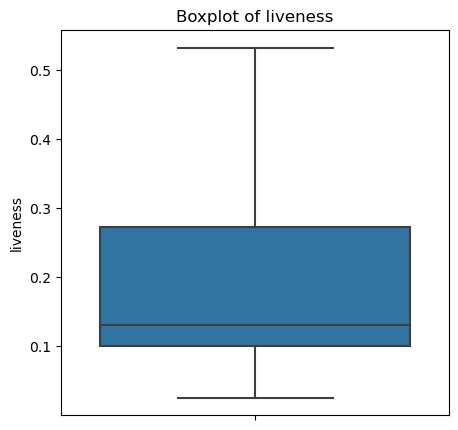

In [39]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='liveness', data=df)
plt.title('Boxplot of liveness')
plt.savefig("Boxplot of liveness after outlier.png")
plt.show()

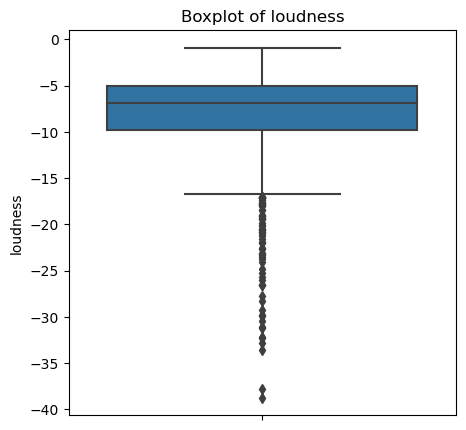

In [40]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='loudness', data=df)
plt.title('Boxplot of loudness')
plt.savefig("Boxplot of loudness.png")
plt.show()

In [41]:
#use IQR method to handle outliers           
q1 = df['loudness'].quantile(0.25)
q3 = df['loudness'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(-9.7755, -4.97775, 4.797749999999999)

In [42]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-16.972125, 2.218874999999998)

In [43]:
df.loc[(df['loudness'] > upper_limit) | (df['loudness'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
14,38026,65.000,0.890,0.600,217400.000,0.2430,0.002200,0.2490,-17.085,0.0366,110.535000,0.4680,1
15,38548,58.000,0.880,0.309,241013.000,0.1790,0.000346,0.1170,-17.077,0.0337,121.498000,0.1670,1
79,38757,57.000,0.968,0.573,115827.000,0.2350,0.019800,0.1050,-16.982,0.0426,79.578000,0.8340,1
109,36343,53.000,0.634,0.608,168027.000,0.1780,0.107063,0.1660,-17.109,0.0264,84.780000,0.4010,1
153,39907,61.000,0.836,0.330,187040.000,0.2140,0.070100,0.1780,-17.699,0.0311,147.795000,0.2750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,20262,50.000,0.011,0.672,173933.000,0.5000,0.012000,0.2870,-18.390,0.0445,105.357000,0.9620,0
979,5205,25.000,0.990,0.296,263240.000,0.2340,0.107063,0.0781,-19.277,0.0430,129.471000,0.2940,0
987,43943,29.000,0.916,0.230,380271.875,0.0408,0.107063,0.0855,-23.741,0.0459,119.952961,0.1050,0
994,9233,16.375,0.812,0.615,109107.000,0.2290,0.107063,0.1650,-18.944,0.0472,184.591000,0.0863,0


In [44]:
df.loc[(df['loudness']>=upper_limit), 'loudness'] = upper_limit
df.loc[(df['loudness']<=lower_limit), 'loudness'] = lower_limit

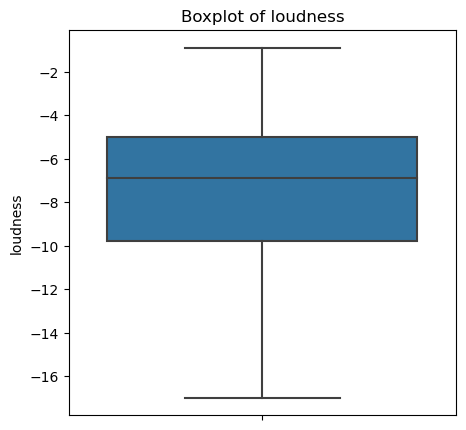

In [45]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='loudness', data=df)
plt.title('Boxplot of loudness')
plt.savefig("Boxplot of loudness after outlier.png")
plt.show()

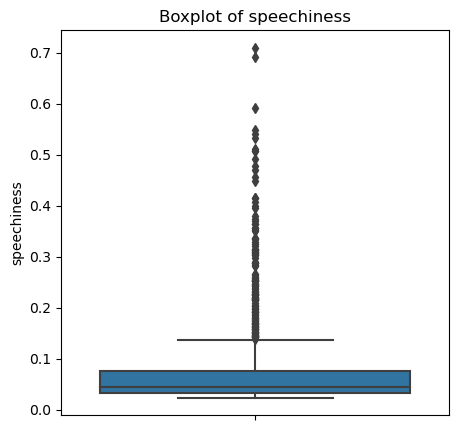

In [46]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='speechiness', data=df)
plt.title('Boxplot of speechiness')
plt.savefig("Boxplot of speechiness.png")
plt.show()

In [47]:
#use IQR method to handle outliers           
q1 = df['speechiness'].quantile(0.25)
q3 = df['speechiness'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(0.0331, 0.07495, 0.041850000000000005)

In [48]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-0.029675000000000014, 0.13772500000000001)

In [49]:
df.loc[(df['speechiness'] > upper_limit) | (df['speechiness'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
2,37658,59.0,0.000075,0.352,380271.875,0.956,0.020300,0.125000,-3.634,0.149,122.897,0.2280,1
23,35647,56.0,0.004630,0.469,207967.000,0.854,0.000000,0.344000,-5.030,0.164,186.061,0.5590,1
71,35089,51.0,0.491000,0.617,141091.000,0.656,0.000008,0.079600,-8.023,0.304,84.712,0.4750,1
101,36674,71.0,0.538000,0.404,148053.000,0.430,0.000000,0.080200,-12.327,0.224,180.061,0.6410,1
103,39444,67.0,0.338000,0.633,60886.875,0.559,0.000000,0.262000,-5.135,0.313,114.983,0.4730,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,853,35.0,0.049700,0.669,190119.000,0.793,0.000049,0.142000,-6.898,0.153,127.994,0.4390,0
992,28567,47.0,0.023700,0.682,241120.000,0.523,0.000000,0.180000,-9.690,0.335,170.049,0.3660,0
993,49516,67.0,0.299000,0.575,204040.000,0.684,0.000000,0.533125,-6.007,0.325,172.155,0.9260,0
996,25114,56.0,0.005790,0.939,144453.000,0.373,0.000000,0.274000,-7.779,0.227,119.953,0.0602,0


In [50]:
df.loc[(df['speechiness']>=upper_limit), 'speechiness'] = upper_limit
df.loc[(df['speechiness']<=lower_limit), 'speechiness'] = lower_limit

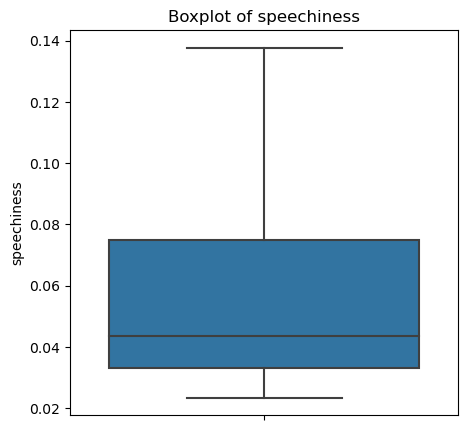

In [51]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='speechiness', data=df)
plt.title('Boxplot of speechiness')
plt.savefig("Boxplot of speechiness after outlier.png")
plt.show()

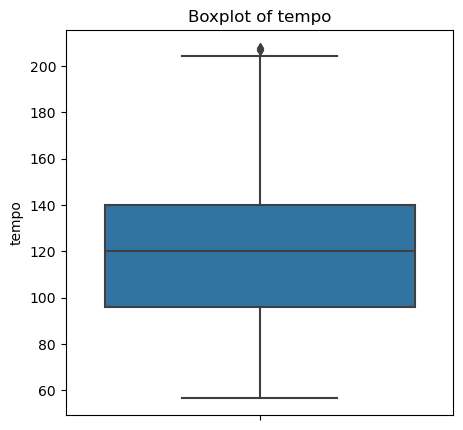

In [52]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='tempo', data=df)
plt.title('Boxplot of tempo')
plt.savefig("Boxplot of tempo.png")
plt.show()

In [53]:
#use IQR method to handle outliers           
q1 = df['tempo'].quantile(0.25)
q3 = df['tempo'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(95.90975, 140.03300000000002, 44.12325000000001)

In [54]:
#calculate upper and lower 
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(29.724874999999983, 206.21787500000005)

In [55]:
df.loc[(df['tempo'] > upper_limit) | (df['tempo'] < lower_limit)]

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
552,33610,40.0,0.000107,0.158,267400.000,0.742,0.107063,0.364,-6.508,0.064900,206.863,0.0653,0
660,47254,55.0,0.051700,0.573,60886.875,0.738,0.000079,0.120,-5.855,0.137725,207.852,0.5650,0


In [56]:
df.loc[(df['tempo']>=upper_limit), 'tempo'] = upper_limit
df.loc[(df['tempo']<=lower_limit), 'tempo'] = lower_limit

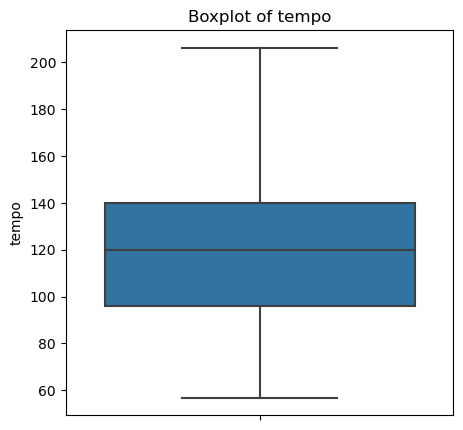

In [57]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='tempo', data=df)
plt.title('Boxplot of tempo')
plt.savefig("Boxplot of tempo after outlier.png")
plt.show()

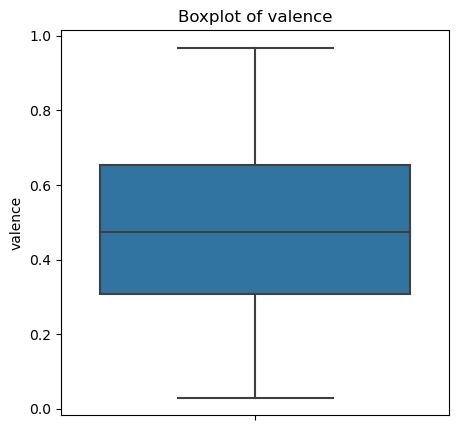

In [58]:
plt.figure(figsize=(5, 5))
sbn.boxplot(y='valence', data=df)
plt.title('Boxplot of valence')
plt.savefig("Boxplot of valence.png")
plt.show()


In [59]:
X=df.drop(['genre'],axis=1)
Y=df['genre']

In [60]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [63]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)

#Feature Scalling --> for standardization 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Hyper tuning 
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=1)


In [64]:
# fitting the model
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
best_model = LogisticRegression(**best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}


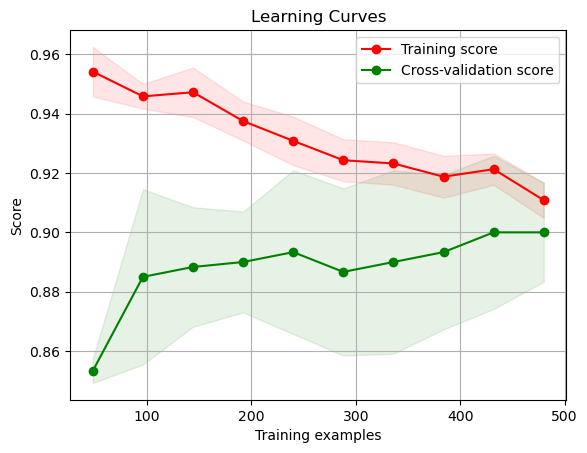

In [65]:
def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, 
                                                           train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

plot_learning_curve(best_model, X_train, Y_train, cv=5)

In [66]:
# Train the Logistic Regression model 

best_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [67]:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.884375


In [68]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9


In [69]:
# report
best_report = classification_report(Y_test, y_test_pred)
print("Classification Report with Best Parameters:")
print(best_report)

Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.90      0.94      0.92        49

    accuracy                           0.90        80
   macro avg       0.90      0.89      0.89        80
weighted avg       0.90      0.90      0.90        80



In [71]:
# SVM with Grid Search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only used for 'poly' kernel
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, Y_train)

best_params_svm = grid_search_svm.best_params_
best_model_svm = SVC(**best_params_svm)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


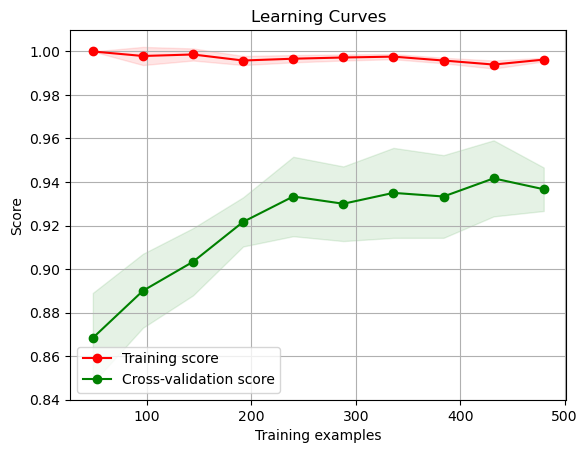

In [72]:
plot_learning_curve(best_model_svm, X_train, Y_train, cv=5)

In [73]:
best_model_svm.fit(X_train, Y_train)
y_pred_best_svm = best_model_svm.predict(X_test)

In [74]:
y_val_pred = best_model_svm.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.93125


In [75]:
y_test_pred = best_model_svm.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9375


In [76]:
best_report_svm = classification_report(Y_test, y_pred_best_svm)
print("Classification Report with Best Parameters for SVM:")
print(best_report_svm)

Classification Report with Best Parameters for SVM:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.94      0.96      0.95        49

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [78]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_search_dt.fit(X_train, Y_train)
best_params_dt = grid_search_dt.best_params_
print(f"Best parameters: {best_params_dt}")

best_model_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


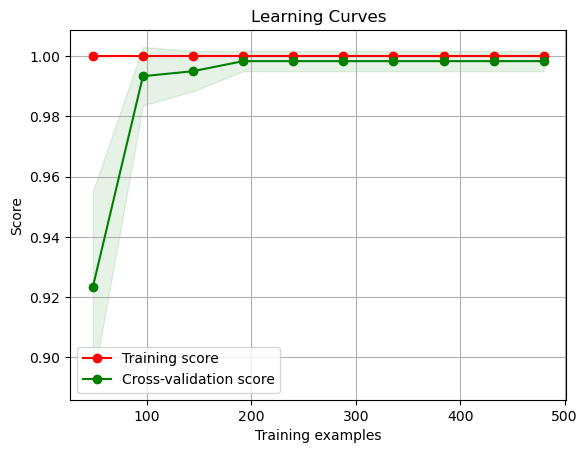

In [79]:
plot_learning_curve(best_model_dt, X_train, Y_train, cv=5)

In [80]:
best_model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [81]:
y_val_pred_dt = best_model_dt.predict(X_val)
val_accuracy_dt = accuracy_score(Y_val, y_val_pred_dt)
print(f"Validation Accuracy: {val_accuracy_dt}")

Validation Accuracy: 0.990625


In [82]:
y_test_pred_dt = best_model_dt.predict(X_test)
test_accuracy_dt = accuracy_score(Y_test, y_test_pred_dt)
print(f"Test Accuracy: {test_accuracy_dt}")

Test Accuracy: 0.9875


In [83]:
best_report_dt = classification_report(Y_test, y_test_pred_dt)
print("Classification Report with Best Parameters:")
print(best_report_dt)

Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        49

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [77]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, Y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = RandomForestClassifier(**best_params_rf)
best_model_rf.fit(X_train, Y_train)
y_pred_best_rf = best_model_rf.predict(X_test)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [78]:
y_val_pred = best_model_rf.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 1.0


In [79]:
y_test_pred = best_model_rf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0


In [80]:
best_report_rf = classification_report(Y_test, y_pred_best_rf)
print("Classification Report with Best Parameters for Random Forest:")
print(best_report_rf)

Classification Report with Best Parameters for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        49

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

